learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

0
[[ 0.          0.          0.         ...  0.          0.
   1.        ]
 [-0.40612485  0.11144324  0.19315385 ...  0.64987318  0.18924236
   1.        ]
 [ 0.42797117 -0.51848796  0.89623013 ...  0.24129103 -0.68878884
   1.        ]
 ...
 [ 0.98791089 -0.01752479 -0.55974422 ...  0.81614122 -0.56152555
   1.        ]
 [ 0.98851299 -0.08574247 -0.53872153 ...  0.82549079 -0.47828984
   1.        ]
 [ 0.98928741 -0.15239953 -0.51759071 ...  0.83872194 -0.39836727
   1.        ]]
[[ 0.          0.          0.         ...  0.          0.
   1.        ]
 [-0.40612485  0.11144324  0.19315385 ...  0.64987318  0.18924236
   1.        ]
 [ 0.42797117 -0.51848796  0.89623013 ...  0.24129103 -0.68878884
   1.        ]
 ...
 [ 0.98791089 -0.01752479 -0.55974422 ...  0.81614122 -0.56152555
   1.        ]
 [ 0.98851299 -0.08574247 -0.53872153 ...  0.82549079 -0.47828984
   1.        ]
 [ 0.98928741 -0.15239953 -0.51759071 ...  0.83872194 -0.39836727
   1.        ]]
test error: 
0.139603909809814

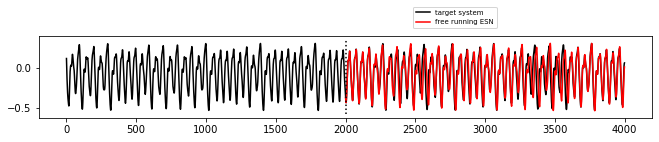

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.5,
          random_state=42)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')